In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

# spacy for lemmatization
import spacy
import json
import warnings
import networkx as nx

warnings.filterwarnings("ignore",category=DeprecationWarning)

import nltk
nltk.download('stopwords')
nltk.download('words')

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.corpus import words
eng_words = words.words('en')

from langdetect import detect
# to enforce consistent results, check github langdetect readme
from langdetect import DetectorFactory
DetectorFactory.seed = 0


import os 

import csv

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/matheesan_manokaran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/matheesan_manokaran/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
df = pd.read_csv('mount/TweetsOnUser.csv', lineterminator='\n', low_memory=False)
df.head()

,id,TweetText,userid,creationtimestamp
0,7515433917751296,Enjoy TSA Pat Down RT Hey everybody Thanksgivi...,194306325,2010-11-24 19:26:33 UTC
1,18960074751868928,Via RT Breaking News Assange signs book deal W...,86711072,2010-12-26 09:23:28 UTC
2,17700051287547904,state of heart soul your soul Birthing child m...,39126647,2010-12-22 21:56:35 UTC
3,21446749583314945,Sweet dreams,23262180,2011-01-02 06:04:38 UTC
4,18528789873041408,dramatic real Operation Clean-Up Now RT CRAP R...,71496690,2010-12-25 04:49:42 UTC


In [4]:
tweets = df.TweetText.values.tolist()
userIds = df.userid.values.tolist()
print("PLS")

PLS


In [5]:
dict = {}

for i in range(len(userIds)):
    if userIds[i] not in dict:
        dict[userIds[i]] = []
    for word in str(tweets[i]).split(" "):
        dict[userIds[i]].append(word)


In [6]:
data_final = list(dict.values())

In [7]:
# Create Dictionary
id2word = corpora.Dictionary(data_final)

# Create Corpus
# type(data_lemmatized)
# print (data_lemmatized)
texts = data_final

print(data_final[:1])

[['you!', 'I', 'love', 'xoxo', 'you!', 'I', 'proud', 'of', 'you', 'I', 'love', 'you', 'my', 'day', 'day.', 'After', 'After', 'all', 'all,', 'I', 'was', 'I', 'was', 'born', 'spread', 'I', 'am', 'love', "I'm", 'sadness', 'today', 'who', 'I', 'am', "I'm", 'thankful', 'everything', 'everyone', 'good', 'and', 'the', 'bad', 'happiness']]


In [8]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Human readable format of corpus (term-frequency)
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

# Build LDA model
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=200, passes=10, workers=7)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

[[('After', 2), ('I', 7), ("I'm", 2), ('all', 1), ('all,', 1), ('am', 2), ('and', 1), ('bad', 1), ('born', 1), ('day', 1), ('day.', 1), ('everyone', 1), ('everything', 1), ('good', 1), ('happiness', 1), ('love', 3), ('my', 1), ('of', 1), ('proud', 1), ('sadness', 1), ('spread', 1), ('thankful', 1), ('the', 1), ('today', 1), ('was', 2), ('who', 1), ('xoxo', 1), ('you', 2), ('you!', 2)]]
[(12,
  '0.037*"du" + 0.035*"des" + 0.030*"et" + 0.023*"pour" + 0.021*"sur" + '
  '0.020*"France" + 0.018*"au" + 0.018*"les" + 0.017*"une" + 0.017*"Les"'),
 (68,
  '0.045*"hours" + 0.041*"fail" + 0.035*"What\'s" + 0.028*"Game" + '
  '0.028*"move" + 0.018*"broken" + 0.016*"Amtrak" + 0.015*"SALE" + '
  '0.014*"epic" + 0.013*"horror"'),
 (3,
  '0.393*"FollowFriday" + 0.184*"week" + 0.088*"Celebrity" + 0.028*"Twitter" + '
  '0.022*"Colombian" + 0.019*"Brazilian" + 0.018*"Costa" + 0.017*"Rican" + '
  '0.017*"this" + 0.014*"Dominican"'),
 (124,
  '0.078*"you" + 0.063*"follow" + 0.053*"FOLLOW" + 0.042*"YOU" + 0

### LDA Visualization

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, 'LDA_Visualization.html')

In [8]:
# def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row in enumerate(ldamodel[corpus]):
#         print(row) 
#         topics = []
#         row = sorted(row, key=lambda x: (x[1]), reverse=True) 
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j in [0,1,2]: 
#                 topics.append(topic_num)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
# #             if j in [0,1,2]: #top 3 dominant topics
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([topics, round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_final):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_final)

In [9]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
#TER
# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,25.0,0.6109,"RT, you, I, me, I'm, , my, lol, can, up","[you!, I, love, xoxo, you!, I, proud, of, you,..."
1,1,4.0,0.7433,"you, RT, can, life, will, the, who, people, lo...","[H., Jackson, Brown,, Jr, screwdriver, RT, Inf..."
2,2,85.0,0.6729,"RT, Obama, you, will, GOP, tax, we, who, the, ...","[opinion, Sen, Cornyn, Repeal, Don’t, Ask,Don’..."
3,3,4.0,0.4018,"you, RT, can, life, will, the, who, people, lo...","[Hope, stepson, hear, people, power, power, is..."
4,4,50.0,0.2841,"RT, game, , NFL, will, out, up, win, the, season","[Follow, Official, Goon, Gang, Djs, Week, 1, T..."
5,5,63.0,0.4881,"RT, , you, out, will, the, now, of, today, we","[charity:water, Paul, 1:1, 1, time, with, me, ..."
6,6,25.0,0.4790,"RT, you, I, me, I'm, , my, lol, can, up","[Blue, Laws, Christmas, outlawed, Boston, you,..."
7,7,16.0,0.6171,"you, Christmas, Happy, New, Thanksgiving, Year...","[Pink, Floyd, Wall, concert, last, night, pret..."
8,8,58.0,0.5559,", RT, health, you, Health, food, cancer, to, h...","[Search, the, best, doctor, near, you, fb, wei..."
9,9,59.0,0.4939,"E, T, card, O, Panamanian, A, R, L, S, BANK","[Prototype, lanzó, su, 2011, e, Ivan, de, Pine..."


In [14]:
userId_final = list(dict.keys())
userIdsCol = pd.DataFrame(userId_final)
userIdsCol.columns = ['User_Id']
userIdsCol.head(10)

,User_Id
0,55836675
1,61560150
2,17563655
3,72613897
4,55050251
5,12
6,13
7,76082318
8,18874383
9,64749586


In [15]:
df_final = df_dominant_topic.merge(userIdsCol, left_index=True, right_index=True)
df_final.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,User_Id
0,0,25.0,0.6109,"RT, you, I, me, I'm, , my, lol, can, up","[you!, I, love, xoxo, you!, I, proud, of, you,...",55836675
1,1,4.0,0.7433,"you, RT, can, life, will, the, who, people, lo...","[H., Jackson, Brown,, Jr, screwdriver, RT, Inf...",61560150
2,2,85.0,0.6729,"RT, Obama, you, will, GOP, tax, we, who, the, ...","[opinion, Sen, Cornyn, Repeal, Don’t, Ask,Don’...",17563655
3,3,4.0,0.4018,"you, RT, can, life, will, the, who, people, lo...","[Hope, stepson, hear, people, power, power, is...",72613897
4,4,50.0,0.2841,"RT, game, , NFL, will, out, up, win, the, season","[Follow, Official, Goon, Gang, Djs, Week, 1, T...",55050251
5,5,63.0,0.4881,"RT, , you, out, will, the, now, of, today, we","[charity:water, Paul, 1:1, 1, time, with, me, ...",12
6,6,25.0,0.4790,"RT, you, I, me, I'm, , my, lol, can, up","[Blue, Laws, Christmas, outlawed, Boston, you,...",13
7,7,16.0,0.6171,"you, Christmas, Happy, New, Thanksgiving, Year...","[Pink, Floyd, Wall, concert, last, night, pret...",76082318
8,8,58.0,0.5559,", RT, health, you, Health, food, cancer, to, h...","[Search, the, best, doctor, near, you, fb, wei...",18874383
9,9,59.0,0.4939,"E, T, card, O, Panamanian, A, R, L, S, BANK","[Prototype, lanzó, su, 2011, e, Ivan, de, Pine...",64749586


In [16]:
df_final.to_csv('finalDF.csv')

In [17]:
G=nx.Graph()
for row in df_final.itertuples(index=False):
    G.add_node(row.User_Id)
    if row.Dominant_Topic not in G:
        G.add_node(row.Dominant_Topic)
    G.add_edge(row.User_Id, row.Dominant_Topic, weight=row.Topic_Perc_Contrib)

/home/matheesan_manokaran/.local/lib/python3.5/site-packages/networkx/drawing/layout.py:605: RuntimeWarning: invalid value encountered in less
  length = np.where(length < 0.01, 0.1, length)
/home/matheesan_manokaran/.local/lib/python3.5/site-packages/networkx/drawing/layout.py:597: RuntimeWarning: invalid value encountered in less
  distance = np.where(distance < 0.01, 0.01, distance)


MemoryError: 

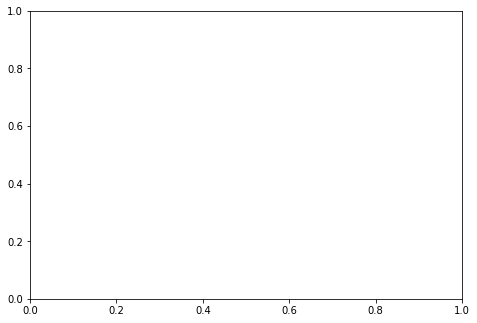

In [18]:
# Takes a while for graph to be displayed, cpu/ram increases so 
# instead of running this, printing out the nodes and edges is easier to
# inspect the graph

nx.draw(G)
plt.show()

In [ ]:
for line in nx.generate_edgelist(G):
    print (line)

In [ ]:
print(G.number_of_edges()) 
# gives 132723 edges, same as the number of user_ids